In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
#importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Heart_Disease.csv')
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  num  
0        0   0     1    1  
1        0   0     2    1  
2  

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [4]:
#Checking the columns
df.shape

(303, 14)

In [5]:
#checking the data types of the columns
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [6]:
#Cheking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().values.any()

False

In [9]:
#Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


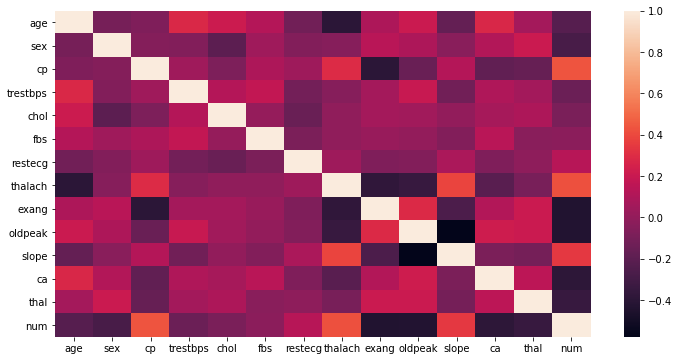

In [11]:
plt.figure(figsize=(12,6))
sn.heatmap(df.corr())
plt.show()

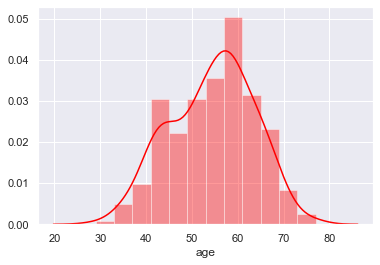

In [12]:
sn.set()
sn.distplot(df['age'],color='red')
plt.show()

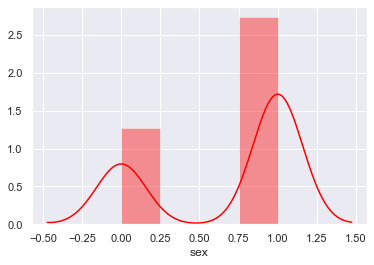

In [13]:
sn.set()
sn.distplot(df['sex'],color='red')
plt.show()

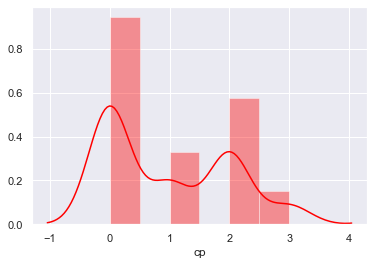

In [14]:
sn.set()
sn.distplot(df['cp'],color='red')
plt.show()

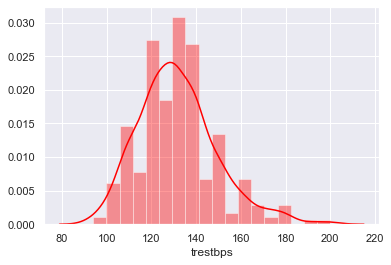

In [15]:
sn.set()
sn.distplot(df['trestbps'],color='red')
plt.show()

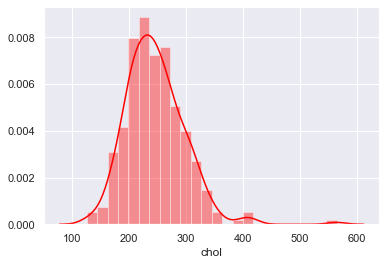

In [16]:
sn.set()
sn.distplot(df['chol'],color='red')
plt.show()

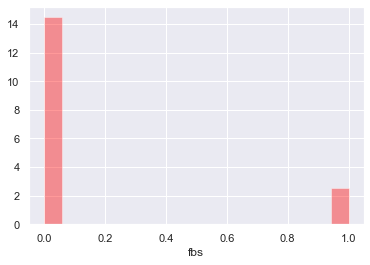

In [17]:
sn.set()
sn.distplot(df['fbs'],color='red')
plt.show()

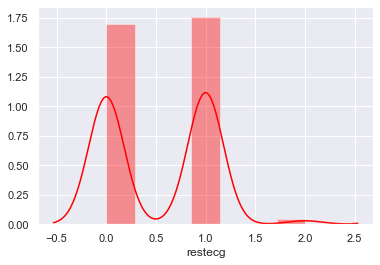

In [18]:
sn.set()
sn.distplot(df['restecg'],color='red')
plt.show()

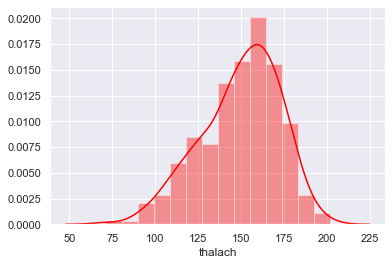

In [19]:
sn.set()
sn.distplot(df['thalach'],color='red')
plt.show()

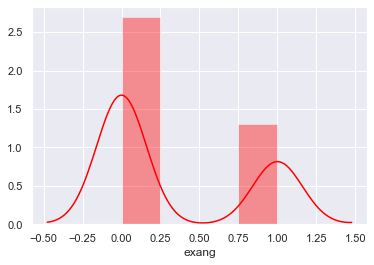

In [20]:
sn.set()
sn.distplot(df['exang'],color='red')
plt.show()

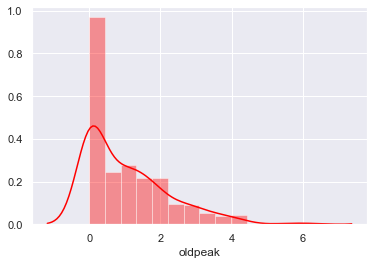

In [21]:
sn.set()
sn.distplot(df['oldpeak'],color='red')
plt.show()

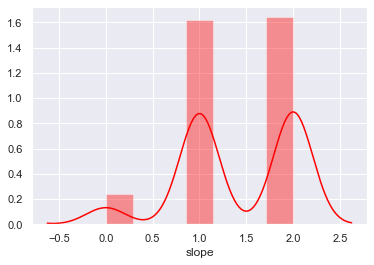

In [22]:
sn.set()
sn.distplot(df['slope'],color='red')
plt.show()

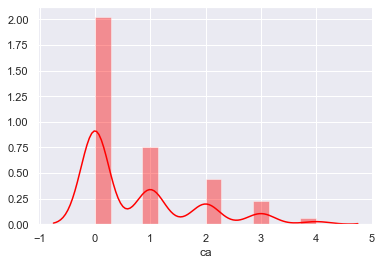

In [23]:
sn.set()
sn.distplot(df['ca'],color='red')
plt.show()

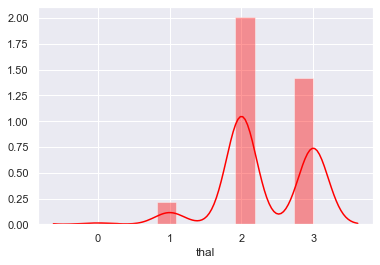

In [24]:
sn.set()
sn.distplot(df['thal'],color='red')
plt.show()

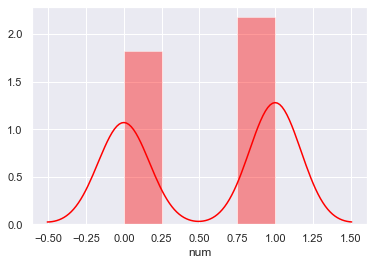

In [25]:
sn.set()
sn.distplot(df['num'],color='red')
plt.show()

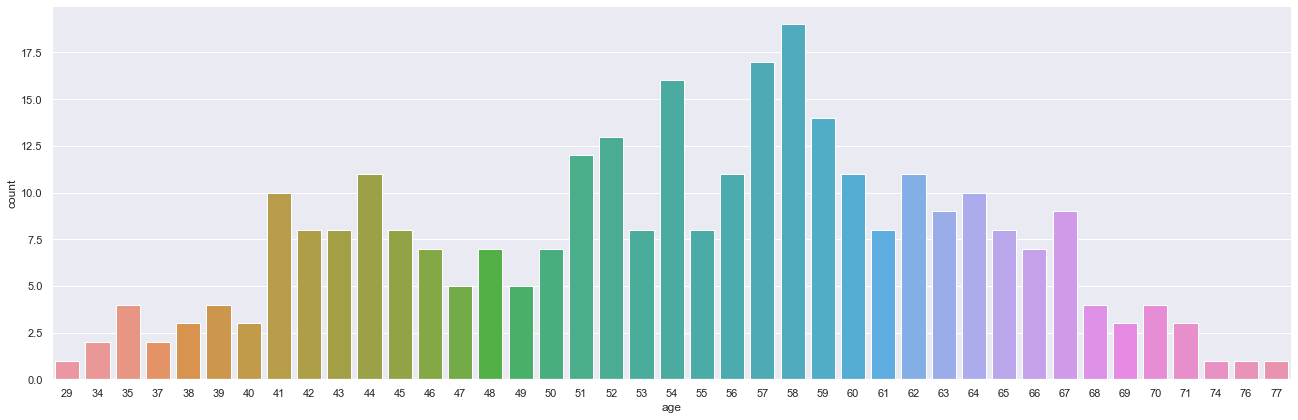

In [26]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='age')
plt.show()

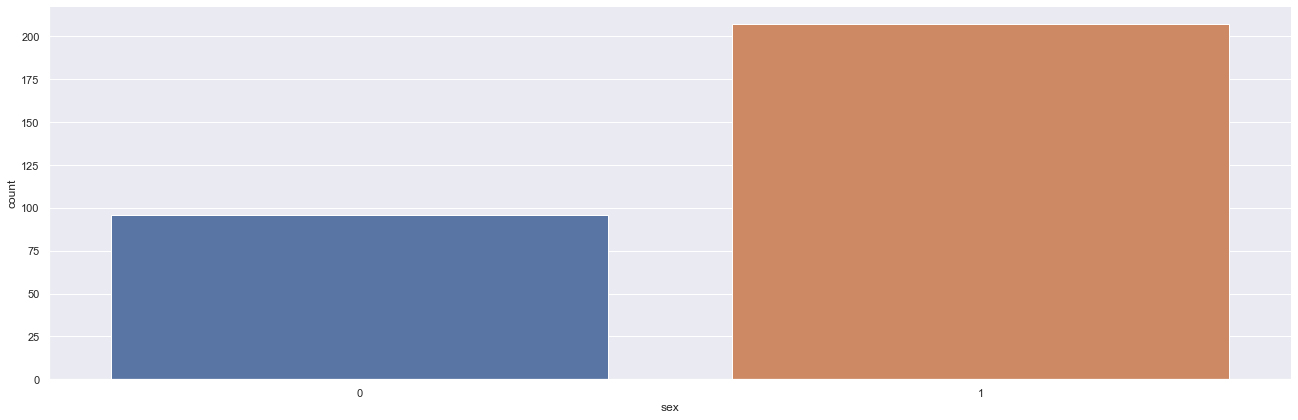

In [27]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='sex')
plt.show()

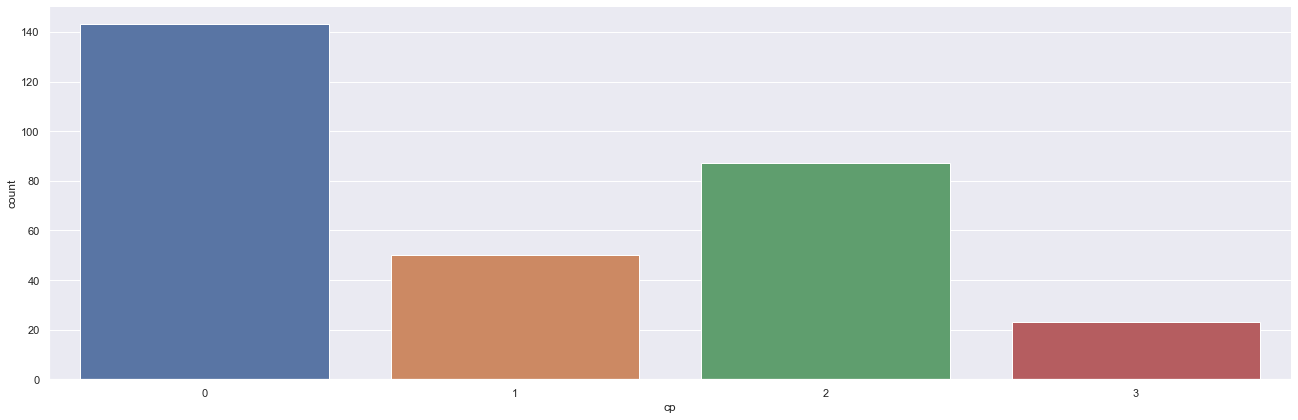

In [28]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='cp')
plt.show()

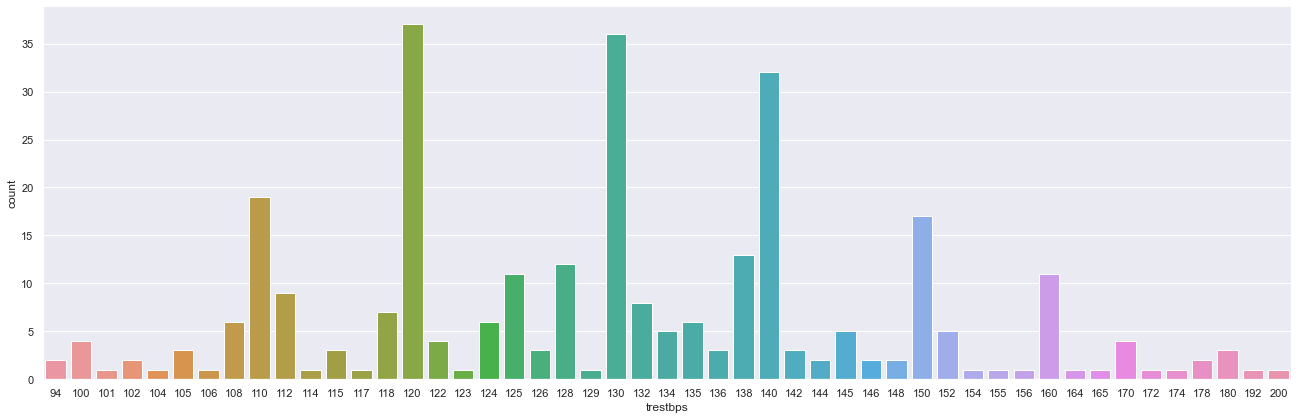

In [29]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='trestbps')
plt.show()

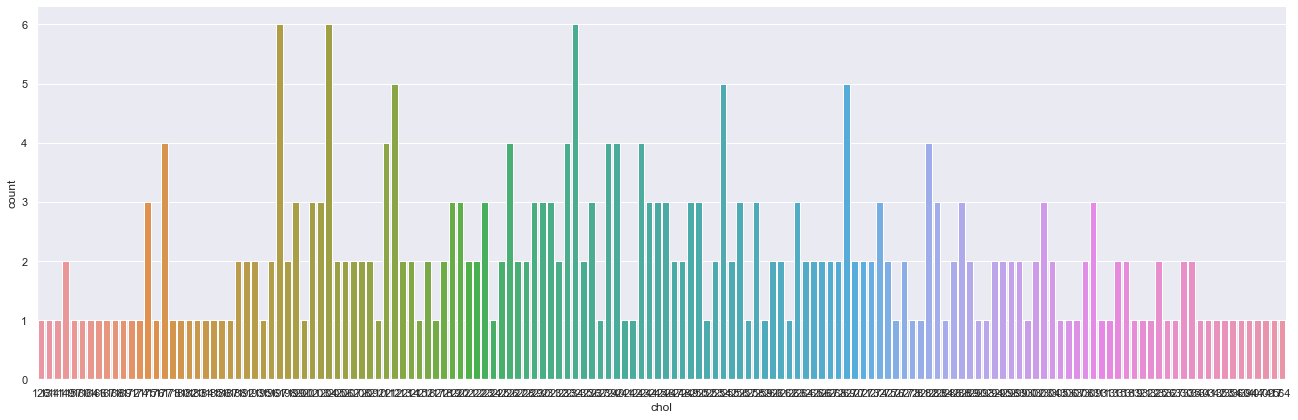

In [30]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='chol')
plt.show()

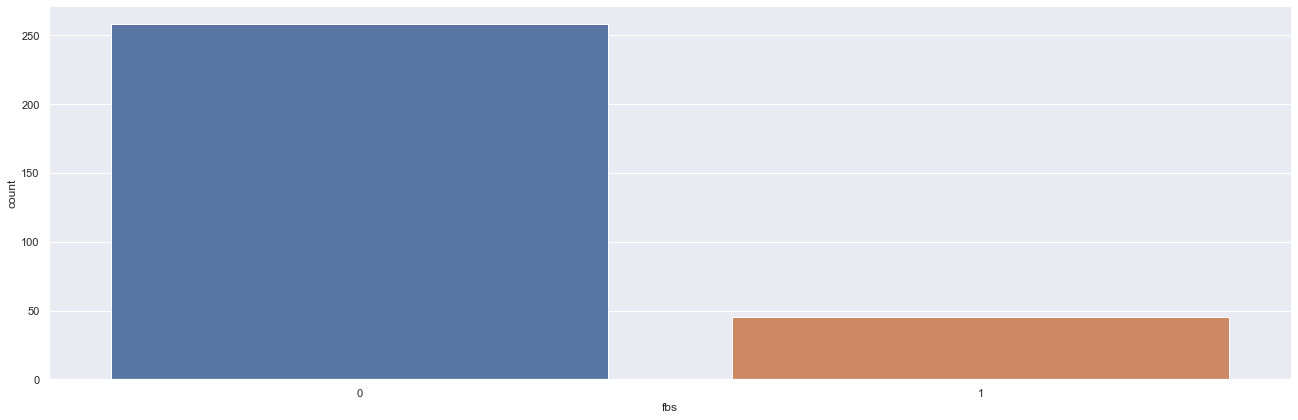

In [31]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='fbs')
plt.show()

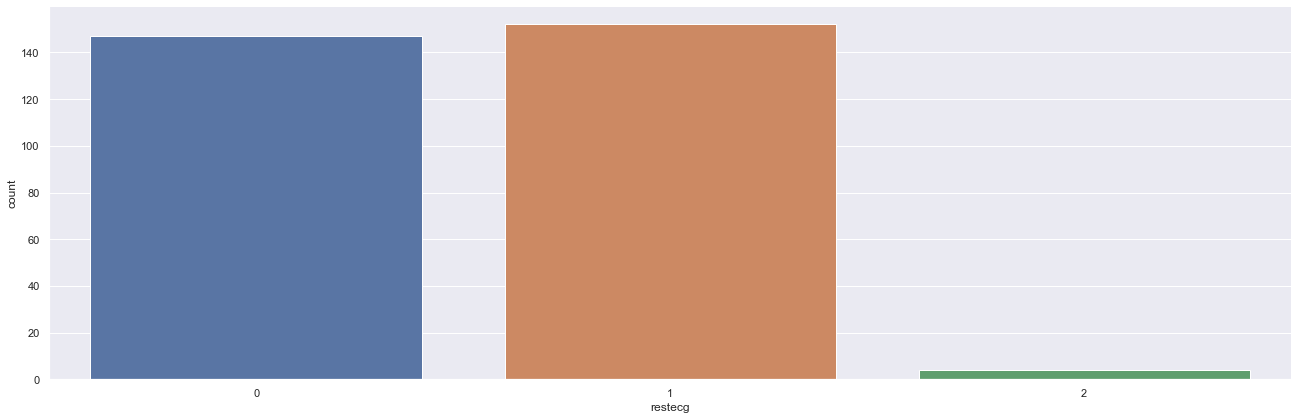

In [32]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='restecg')
plt.show()

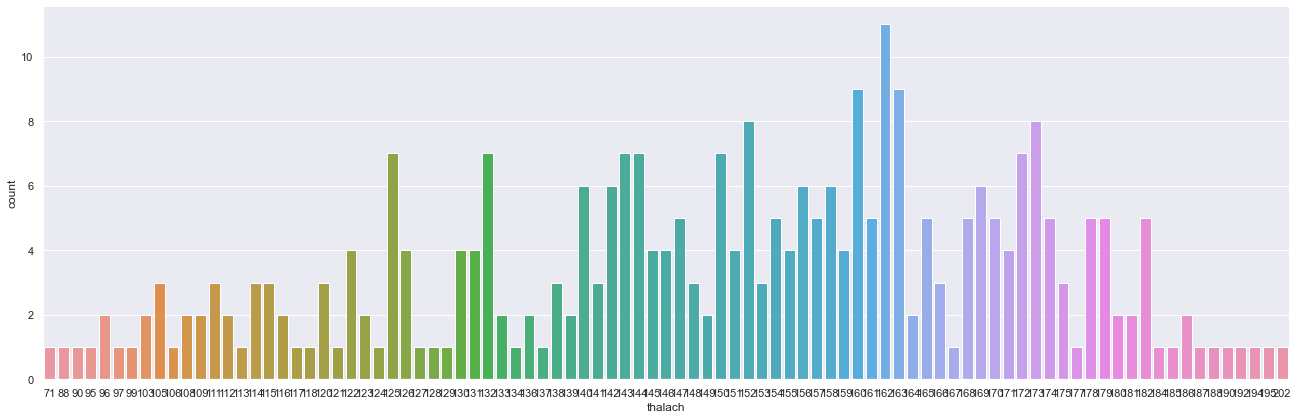

In [33]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='thalach')
plt.show()

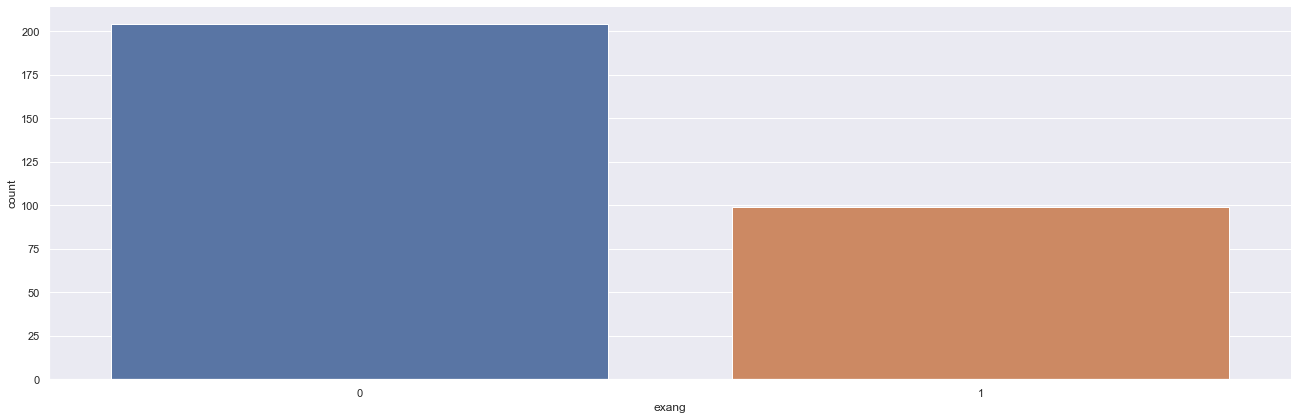

In [34]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='exang')
plt.show()

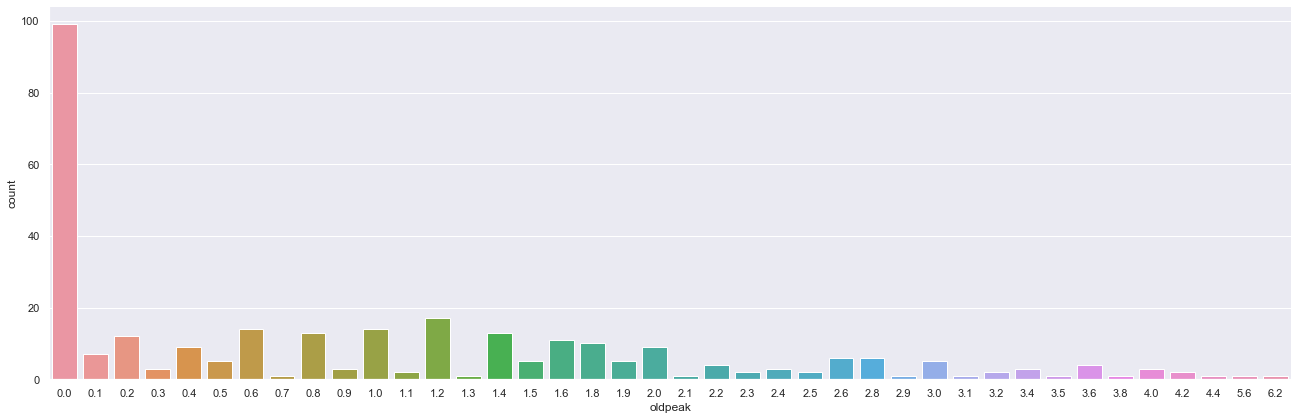

In [35]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='oldpeak')
plt.show()

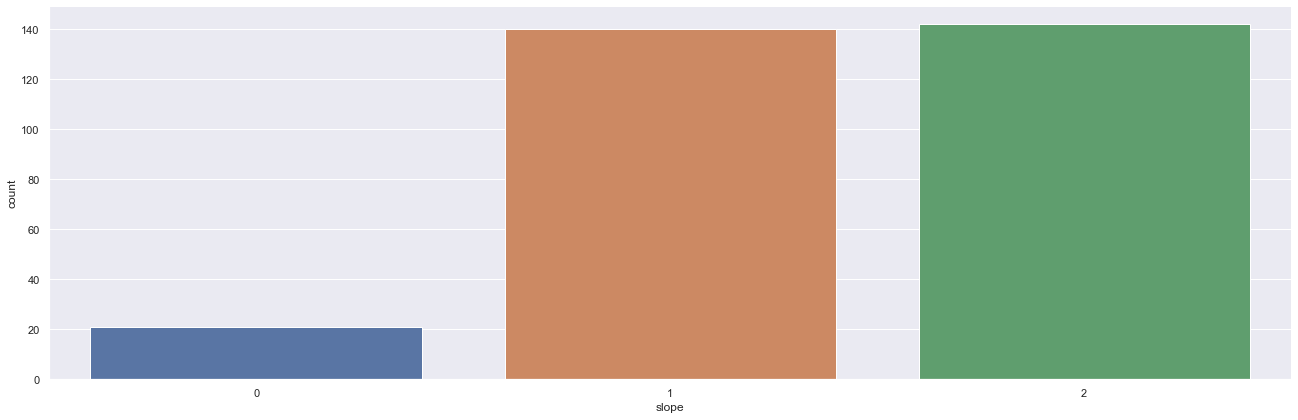

In [36]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='slope')
plt.show()

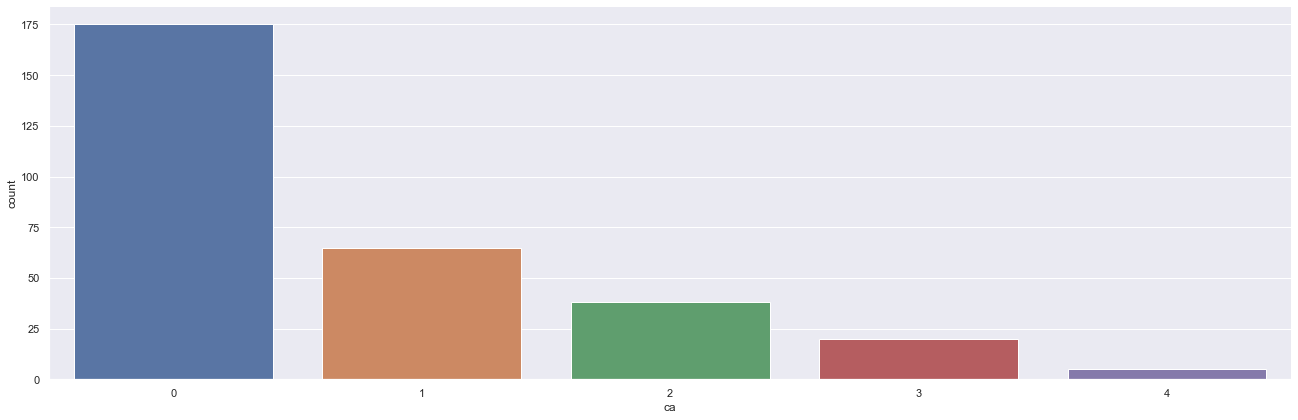

In [37]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='ca')
plt.show()

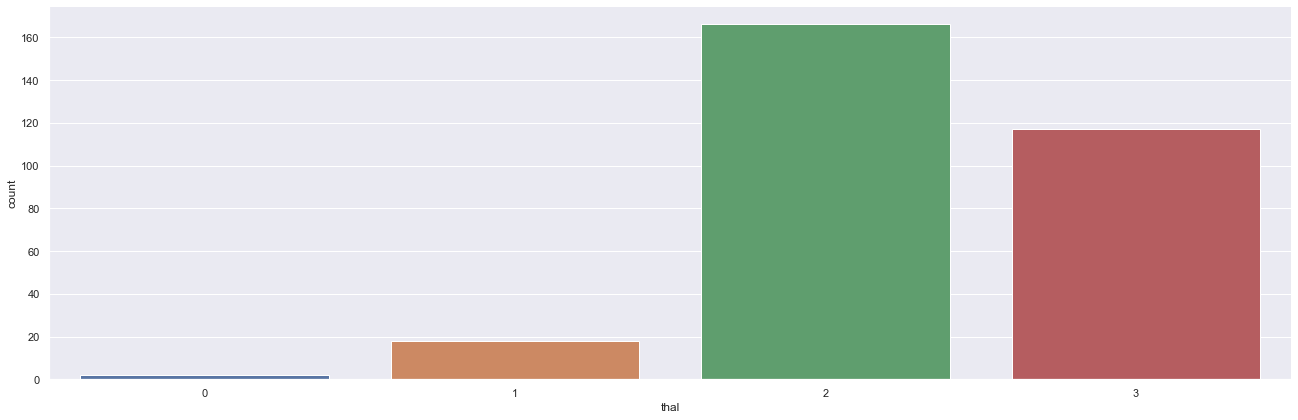

In [38]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='thal')
plt.show()

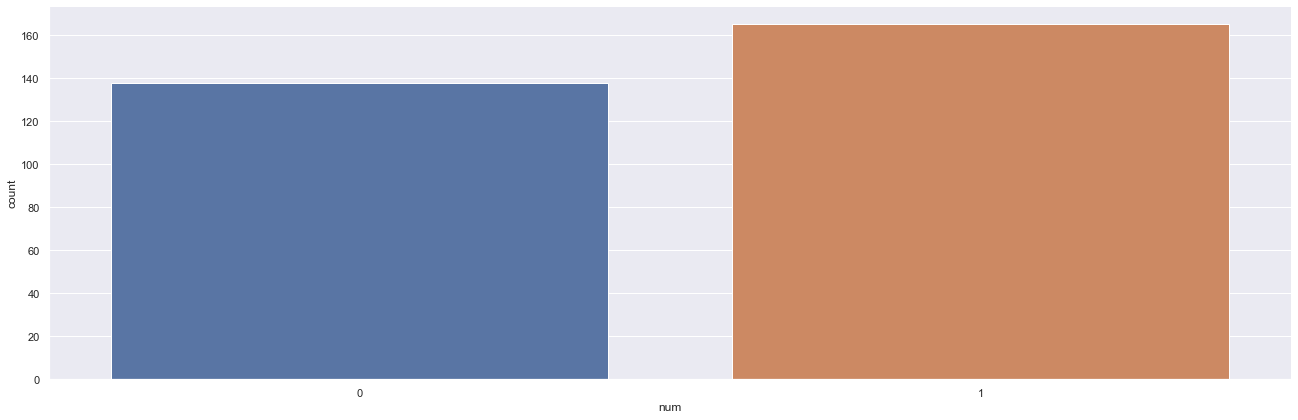

In [39]:
sn.factorplot(data=df,kind='count', size=6, aspect=3, x='num')
plt.show()

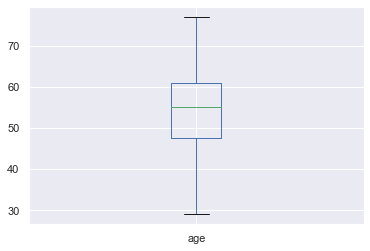

In [40]:
df['age'].plot.box()
plt.show()

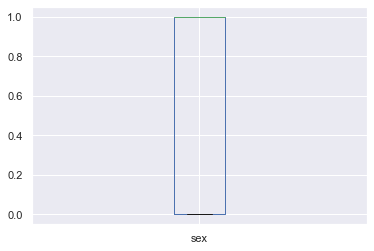

In [41]:
df['sex'].plot.box()
plt.show()

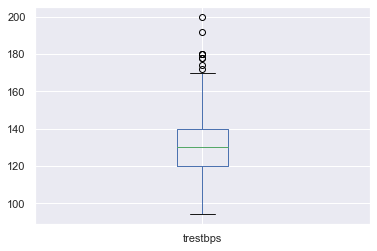

In [42]:
df['trestbps'].plot.box()
plt.show()

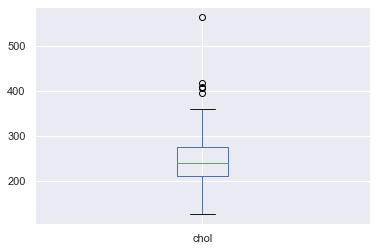

In [43]:
df['chol'].plot.box()
plt.show()

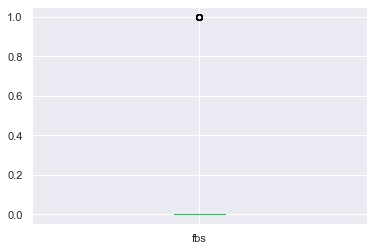

In [44]:
df['fbs'].plot.box()
plt.show()

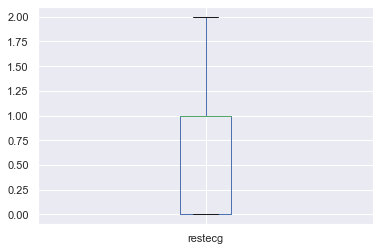

In [45]:
df['restecg'].plot.box()
plt.show()

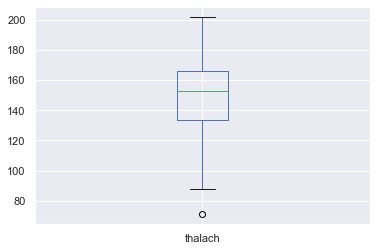

In [46]:
df['thalach'].plot.box()
plt.show()

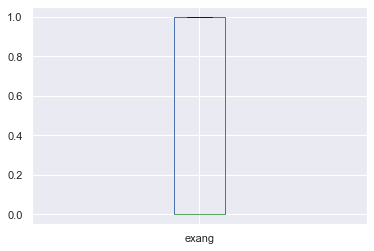

In [47]:
df['exang'].plot.box()
plt.show()

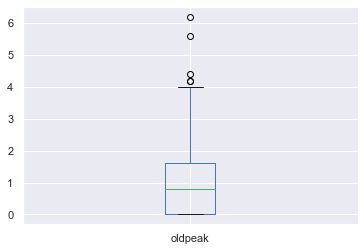

In [48]:
df['oldpeak'].plot.box()
plt.show()

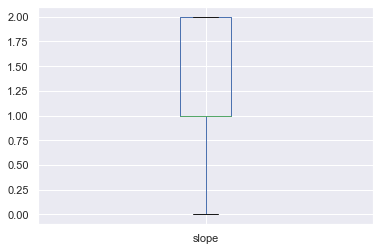

In [49]:
df['slope'].plot.box()
plt.show()

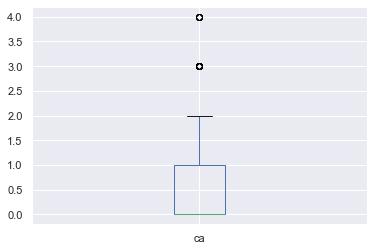

In [50]:
df['ca'].plot.box()
plt.show()

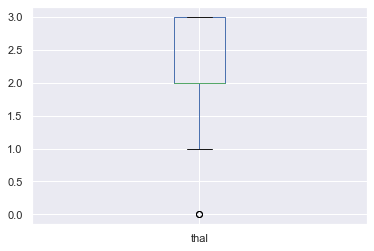

In [51]:
df['thal'].plot.box()
plt.show()

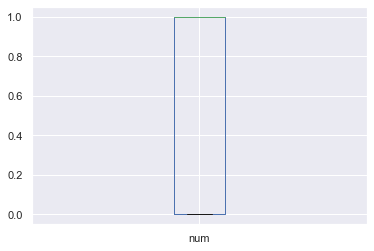

In [52]:
df['num'].plot.box()
plt.show()

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.9521966 , 0.68100522, 1.97312292, ..., 0.71442887, 2.14887271,
        0.91452919],
       [1.91531289, 0.68100522, 1.00257707, ..., 0.71442887, 0.51292188,
        0.91452919],
       [1.47415758, 1.46841752, 0.03203122, ..., 0.71442887, 0.51292188,
        0.91452919],
       ...,
       [1.50364073, 0.68100522, 0.93851463, ..., 1.24459328, 1.12302895,
        1.09345881],
       [0.29046364, 0.68100522, 0.93851463, ..., 0.26508221, 1.12302895,
        1.09345881],
       [0.29046364, 1.46841752, 0.03203122, ..., 0.26508221, 0.51292188,
        1.09345881]])

In [54]:
#sEPRATING INTO input and output variables
x=df.drop(['num'],axis=1)
y=y=df['num']

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier (n_estimators=10,criterion='entropy',random_state=0)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [69]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3


In [70]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [71]:
rf.score(x_train,y_train)

0.9905660377358491

Accuracyfor tested data=99.05%

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

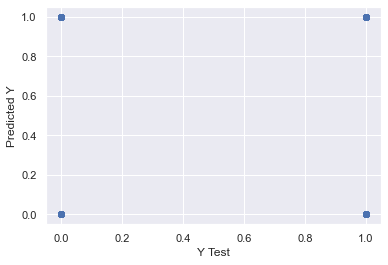

In [61]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [72]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.2857142857142857
Mean Squared Error: 0.2857142857142857
Root Mean Squared Error: 0.5345224838248488


In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

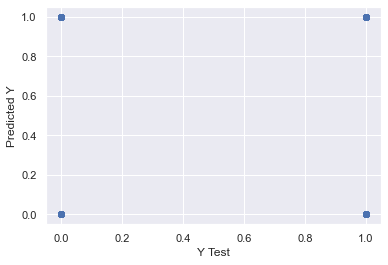

In [74]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.27472527472527475
Mean Squared Error: 0.27472527472527475
Root Mean Squared Error: 0.5241424183609592


In [76]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.26604395604395603
MSE: 0.12734615384615383
RMSE: 0.3568559286969376


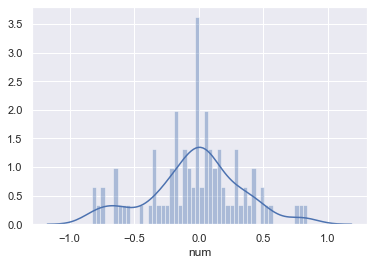

In [78]:
sn.distplot((y_test-pred),bins=50)
plt.show()

,Y Test,Pred
225,0,0.15
152,1,0.70
228,0,0.65
201,0,0.01
52,1,0.20


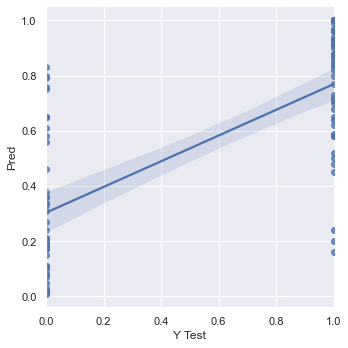

In [79]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sn.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()